In [1]:
from Bio import SeqIO
import gzip
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

from model import PlantBertModel

2022-04-13 17:23:47.482076: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64
2022-04-13 17:23:47.482103: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tokenizer = AutoTokenizer.from_pretrained("../language_model/results/checkpoint-100000")

In [3]:
model = PlantBertModel.load_from_checkpoint("lightning_logs/version_5/checkpoints/epoch=9-step=33449.ckpt")
model.eval()
model = model.cuda()
model

Some weights of the model checkpoint at ../language_model/results/checkpoint-100000/ were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


PlantBertModel(
  (language_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8192, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [23]:
df = pd.read_csv("results_logs.tsv", sep="\t")
df

,run,tag,step,value
0,DNABERT,auprc_DHS_Ath_flower_14_days,27080,0.634451
1,DNABERT,auprc_DHS_Ath_inflorescence_normal,27080,0.440137
2,DNABERT,auprc_DHS_Ath_leaf_normal,27080,0.465153
3,DNABERT,auprc_DHS_Ath_open_flower_normal,27080,0.505751
4,DNABERT,auprc_DHS_Ath_root_7_days,27080,0.574621
...,...,...,...,...
8463,version_5,val_neg_median_auroc,20069,-0.928403
8464,version_5,val_neg_median_auroc,23414,-0.927481
8465,version_5,val_neg_median_auroc,26759,-0.928805
8466,version_5,val_neg_median_auroc,30104,-0.928532


In [24]:
df = df[(df.run=="version_5")&(df.tag.str.contains("auprc")&(df.tag.str.contains("TFBS")))].sort_values("value", ascending=False)
df.head(20)

,run,tag,step,value
6900,version_5,auprc_TFBS_AT5G47640_Ath_seedling_ABA_treatmen...,33450,0.812911
6868,version_5,auprc_TFBS_AT2G46270_Ath_seedling_ABA_treatmen...,33450,0.793997
6869,version_5,auprc_TFBS_AT2G46270_Ath_seedling_normal,33450,0.783138
6880,version_5,auprc_TFBS_AT4G01120_Ath_seedling_ABA_treatmen...,33450,0.767066
6901,version_5,auprc_TFBS_AT5G47640_Ath_seedling_normal,33450,0.759645
6886,version_5,auprc_TFBS_AT4G34000_Ath_seedling_ABA_treatmen...,33450,0.755772
6881,version_5,auprc_TFBS_AT4G01120_Ath_seedling_normal,33450,0.752817
6870,version_5,auprc_TFBS_AT2G46680_Ath_seedling_ABA_treatmen...,33450,0.742847
6875,version_5,auprc_TFBS_AT3G19290_Ath_seedling_ABA_treatmen...,33450,0.740674
6887,version_5,auprc_TFBS_AT4G34000_Ath_seedling_normal,33450,0.717689


In [25]:
df.head(20).tag.values

array(['auprc_TFBS_AT5G47640_Ath_seedling_ABA_treatment_for_4h',
       'auprc_TFBS_AT2G46270_Ath_seedling_ABA_treatment_for_4h',
       'auprc_TFBS_AT2G46270_Ath_seedling_normal',
       'auprc_TFBS_AT4G01120_Ath_seedling_ABA_treatment_for_4h',
       'auprc_TFBS_AT5G47640_Ath_seedling_normal',
       'auprc_TFBS_AT4G34000_Ath_seedling_ABA_treatment_for_4h',
       'auprc_TFBS_AT4G01120_Ath_seedling_normal',
       'auprc_TFBS_AT2G46680_Ath_seedling_ABA_treatment_for_4h',
       'auprc_TFBS_AT3G19290_Ath_seedling_ABA_treatment_for_4h',
       'auprc_TFBS_AT4G34000_Ath_seedling_normal',
       'auprc_TFBS_AT5G04760_Ath_seedling_ABA_treatment_for_4h',
       'auprc_TFBS_AT4G27410_Ath_seedling_ABA_treatment_for_4h',
       'auprc_TFBS_AT2G43010_Ath_seedling_normal_rep3',
       'auprc_TFBS_AT2G22430_Ath_seedling_ABA_treatment_for_4h',
       'auprc_TFBS_AT5G04340_Ath_seedling_ABA_treatment_for_4h',
       'auprc_TFBS_AT3G19290_Ath_seedling_normal',
       'auprc_TFBS_AT5G67300_Ath_seedli

In [8]:
#!wget http://plantregmap.gao-lab.org/download_ftp.php?filepath=08-download/Arabidopsis_thaliana/binding/TFBS_from_FunTFBS_genome-wide_Ath.gff -O TFBS_from_FunTFBS_genome-wide_Ath.gff

In [9]:
class ISMDataset(Dataset):
    def __init__(self, seq=None, tokenizer=None, max_length=None):
        self.seq_str = seq
        self.tokenizer = tokenizer
        self.max_length = max_length
        seq = list(seq)
        nucleotides = ["A", "C", "G", "T"]
        rows = []
        rows.append([-1, "ref", ''.join(seq)])
        for i in range(len(seq)):
            for nucleotide in nucleotides:
                seq2 = seq[:]
                seq2[i] = nucleotide
                rows.append([i, nucleotide, ''.join(seq2)])
        self.df = pd.DataFrame(rows, columns=["pos", "nuc", "seq"])
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        x = self.tokenizer(self.df.iloc[idx].seq, padding="max_length", max_length=self.max_length, return_token_type_ids=False, return_tensors="pt", truncation=True)                                                                                                                              
        x["input_ids"] = x["input_ids"].flatten()
        x["attention_mask"] = x["attention_mask"].flatten()
        return x

In [10]:
with gzip.open("tair10.fa.gz", "rt") as handle:
    genome = SeqIO.to_dict(SeqIO.parse(handle, "fasta"))
genome

{'Chr1': SeqRecord(seq=Seq('CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCC...GGG'), id='Chr1', name='Chr1', description='Chr1 CHROMOSOME dumped from ADB: Feb/3/09 16:9; last updated: 2009-02-02', dbxrefs=[]),
 'Chr2': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...GGG'), id='Chr2', name='Chr2', description='Chr2 CHROMOSOME dumped from ADB: Feb/3/09 16:10; last updated: 2009-02-02', dbxrefs=[]),
 'Chr3': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...CCC'), id='Chr3', name='Chr3', description='Chr3 CHROMOSOME dumped from ADB: Feb/3/09 16:10; last updated: 2009-02-02', dbxrefs=[]),
 'Chr4': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...AGG'), id='Chr4', name='Chr4', description='Chr4 CHROMOSOME dumped from ADB: Feb/3/09 16:10; last updated: 2009-02-02', dbxrefs=[]),
 'Chr5': SeqRecord(seq=Seq('TATACCATGTACCCTCAACCTTAAAACCCTAAAACCTATACTATAAATCTTTAA...ATC'), id='Chr5', name='Chr5', description='

In [11]:
# cat TFBS_from_FunTFBS_genome-wide_Ath.gff | grep AT2G46270 | grep correlation=0.9 | head

In [28]:
# make sure to choose examples in positive strand

#Chr4    PlantRegMap     FunTFBS-genome  9780277 9780286 57      +       .       Name=AT5G04760;ID=AT5G04760_221417;correlation=0.8031;pvalue=5.143e-03;sequence=CAGATAAGGC;


examples = [
    #["AT2G46270", "TFBS_AT2G46270_Ath_seedling_ABA_treatment_for_4h", "Chr1", 588233-1, 588247, "CGCCACGTCATTAAC", -40],
    ["AT2G46270", "TFBS_AT2G46270_Ath_seedling_ABA_treatment_for_4h", "Chr3", 20842478-1, 20842492, "CGCCACGTATGACTT", -40],  # this one is very clear, can repeat with other pos_center
    ["AT2G46680", "TFBS_AT2G46680_Ath_seedling_ABA_treatment_for_4h", "Chr3", 20590100-1, 20590112, "ACAATGATTGGAA", 0],
    ["AT5G04760", "TFBS_AT5G04760_Ath_seedling_ABA_treatment_for_4h", "Chr5", 8874252-1, 8874261, "TGGATAAGGC", 30],
]

0
10
20
30
40
50
60


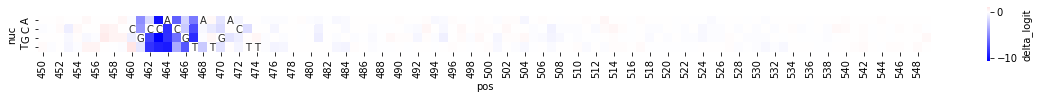

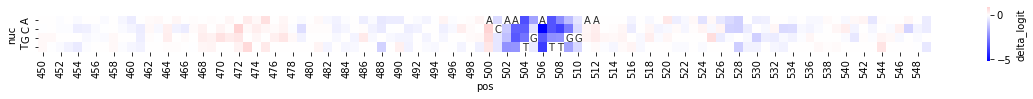

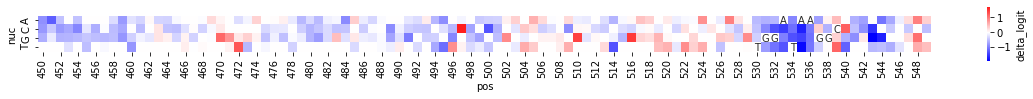

In [29]:
for example in examples:
    tf, track, chromosome, motif_start, motif_end, motif, pos_center = example
    start = motif_start - 500 - pos_center
    end = start + 1000
    seq = str(genome[chromosome][start:end].seq)
    output_path = f"ism_{tf}_{chromosome}_{start}_{end}.tsv"
    if not os.path.exists(output_path):
        d = ISMDataset(seq=seq, tokenizer=tokenizer, max_length=200)
        dl = DataLoader(d, batch_size=64, num_workers=0)
        feature_index = model.feature_names.index(track)
        outputs = []
        i = 0
        for batch in dl:
            if i % 10 == 0: print(i)
            for key, value in batch.items():
                batch[key] = value.cuda()
            with torch.no_grad():
                outputs += model(batch).cpu().numpy()[:, feature_index].tolist()
            i += 1
        df = d.df.copy()
        df["value"] = outputs
        df.to_csv(output_path, sep="\t")
    else:
        df = pd.read_csv(output_path, sep="\t")
    df.value = df.value - df.value.values[0]
    df = df[df.pos != -1]
    df = df.pivot_table(index="pos", columns="nuc", values="value")
    plt.figure(figsize=(20, 20))
    annot = np.full((4, 100), "")
    for i, nuc in enumerate(motif):
        annot[["A", "C", "G", "T"].index(nuc), 50+pos_center+i] = nuc
    sns.heatmap(
        data=df.iloc[450:550].T, square=True, cbar=True,  cbar_kws={"orientation": "vertical", "shrink": .05, "label": "delta_logit"},
        center=0, cmap="bwr", annot=annot, fmt = ''
    )
    plt.savefig(f"ism_{tf}_{chromosome}_{start}_{end}.svg", bbox_inches='tight')